In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dir = "./" # your directory here

gnm = pd.read_csv(dir + 'results_gnm.csv')
bct = pd.read_csv(dir + 'results_bct.csv')

# if time is zero, you know something went wrong so remove it
bct = bct.loc[bct['time_bct'] != 0]
gnm = gnm.loc[gnm['time_gnm'] != 0]

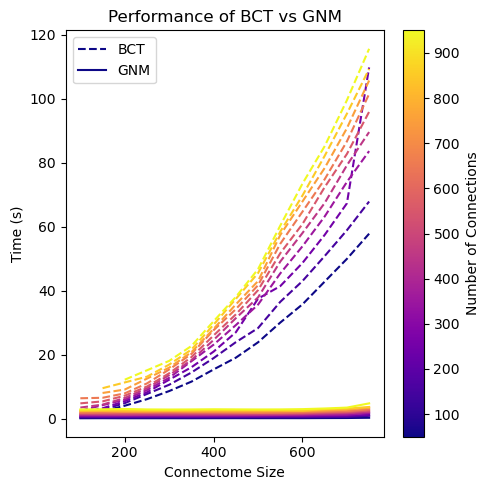

In [ ]:
def visualize_performance(df_bct, df_gnm, title):
    # Extract unique connection values for BCT and GNM
    unique_connections_bct = sorted(df_bct['num_connections'].unique())
    unique_connections_gnm = sorted(df_gnm['num_connections'].unique())
    
    # Normalize the connection values for color mapping
    norm_bct = plt.Normalize(min(unique_connections_bct), max(unique_connections_bct))
    norm_gnm = plt.Normalize(min(unique_connections_gnm), max(unique_connections_gnm))
    
    # Define colormaps for BCT and GNM
    cmap_bct = plt.get_cmap('plasma')
    cmap_gnm = plt.get_cmap('plasma')
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot BCT data with dashed lines
    for d in unique_connections_bct:
        tmp_df = df_bct[df_bct['num_connections'] == d]
        ax.plot(tmp_df['connectome_size'], 
                tmp_df['time_bct'], 
                color=cmap_bct(norm_bct(d)), 
                label=f'BCT' if d == unique_connections_bct[0] else "",
                linestyle='dashed')

    # Plot GNM data with solid lines
    for d in unique_connections_gnm:
        tmp_df = df_gnm[df_gnm['num_connections'] == d]
        ax.plot(tmp_df['connectome_size'], 
                tmp_df['time_gnm'], 
                color=cmap_gnm(norm_gnm(d)), 
                linestyle='-', 
                label=f'GNM' if d == unique_connections_gnm[0] else "")

    # Add colorbars for visualizing the number of connections
    sm_bct = plt.cm.ScalarMappable(cmap=cmap_bct, norm=norm_bct)
    sm_bct.set_array([])
    sm_gnm = plt.cm.ScalarMappable(cmap=cmap_gnm, norm=norm_gnm)
    sm_gnm.set_array([])
    
    cbar_bct = fig.colorbar(sm_bct, ax=ax, label="Number of Connections")
    # Uncomment the following line if a separate colorbar for GNM is needed
    # cbar_gnm = fig.colorbar(sm_gnm, ax=ax, label="GNM n connections")

    # Set axis labels, title, and legend
    ax.set_xlabel("Connectome Size")
    ax.set_ylabel("Time (s)")
    ax.set_title(title)
    ax.legend()

# Call the function to visualize performance
visualize_performance(bct, gnm, title="Performance of BCT vs GNM")
plt.tight_layout()
plt.show()

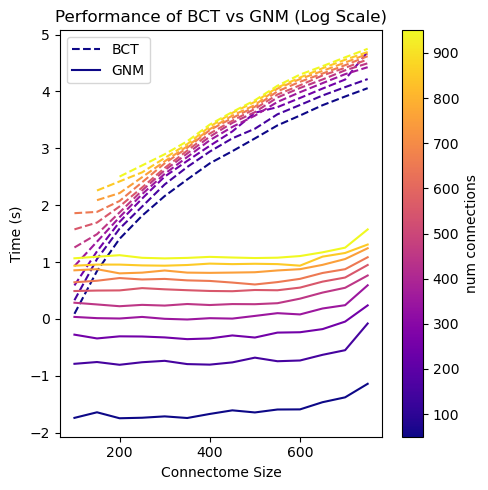

In [ ]:
# plot over log scale

# copy of dataframes to avoid modifying original
bct_log = bct.copy()
bct_log['time_bct'] = np.log(bct_log['time_bct'])

gnm_log = gnm.copy()
gnm_log['time_gnm'] = np.log(gnm_log['time_gnm'])

# use the same function to visualize performance on log scale
visualize_performance(bct_log, gnm_log, "Performance of BCT vs GNM (Log Scale)")
plt.tight_layout()
plt.show()